# Linear Regression

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

In [4]:
from sklearn import linear_model, model_selection, preprocessing

X = housing.select_dtypes('number').drop(columns='SalePrice')
y = housing.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [5]:
X_train

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
844,845,907181100,20,68,9017,7,5,1999,1999,0,...,666,0,35,0,0,0,0,0,9,2009
2730,2731,905351045,150,<NA>,1700,7,5,1980,1981,0,...,450,188,36,0,0,200,0,0,4,2006
2793,2794,907255050,20,<NA>,14781,8,5,2001,2002,178,...,748,198,150,0,0,0,0,0,8,2006
1187,1188,534127230,20,85,11050,6,5,1968,1968,0,...,512,25,0,0,0,192,0,0,10,2008
2770,2771,907130110,60,65,12438,6,5,1995,1995,68,...,473,413,91,0,0,0,0,0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1639,527226040,190,195,41600,5,5,1969,1990,0,...,828,144,0,0,0,0,0,0,11,2007
1095,1096,528290090,60,<NA>,7750,7,5,2002,2002,<NA>,...,403,100,35,0,0,0,0,0,4,2008
1130,1131,528490080,60,64,8791,6,5,2003,2003,0,...,673,216,56,0,0,0,0,0,5,2008
1294,1295,902109160,50,81,7308,5,5,1920,1950,0,...,225,0,0,236,0,0,0,0,6,2008


In [6]:
y_train

844     192000
2730    148400
2793    275000
1187    150000
2770    187000
         ...  
1638    155000
1095    176000
1130    207500
1294    122250
860     133900
Name: SalePrice, Length: 2197, dtype: uint32[pyarrow]

In [7]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
X_train.isna().any()

Order              False
PID                False
MS SubClass        False
Lot Frontage        True
Lot Area           False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Mas Vnr Area        True
BsmtFin SF 1        True
BsmtFin SF 2        True
Bsmt Unf SF         True
Total Bsmt SF       True
1st Flr SF         False
2nd Flr SF         False
Low Qual Fin SF    False
Gr Liv Area        False
Bsmt Full Bath      True
Bsmt Half Bath      True
Full Bath          False
Half Bath          False
Bedroom AbvGr      False
Kitchen AbvGr      False
TotRms AbvGrd      False
Fireplaces         False
Garage Yr Blt       True
Garage Cars         True
Garage Area         True
Wood Deck SF       False
Open Porch SF      False
Enclosed Porch     False
3Ssn Porch         False
Screen Porch       False
Pool Area          False
Misc Val           False
Mo Sold            False
Yr Sold            False
dtype: bool

In [9]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing_no_na(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
     .pipe(lambda df_: df_.assign(**df_.select_dtypes('number').fillna(0)))
    )    
    

housing2 = clean_housing_no_na(raw)

In [10]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [11]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8434707037243714

## Interpreting Linear Regression Models

In [12]:
lr.coef_

array([-1.03814738e+01,  9.02411860e-07, -1.63050576e+02,  2.81284818e+01,
        4.92668567e-01,  1.73466716e+04,  4.84079679e+03,  3.91645014e+02,
        1.76965630e+02,  2.73066661e+01,  1.05967268e+01,  4.13482956e+00,
       -2.72937998e+00,  1.20021763e+01,  1.87157913e+01,  2.54896650e+01,
       -9.18032353e+00,  3.50251329e+01,  7.35666770e+03, -1.51315712e+03,
       -1.41742224e+02, -5.39960782e+03, -7.73039749e+03, -1.43271176e+04,
        1.36191997e+03,  3.51407523e+03, -1.31044446e+01,  1.03630326e+04,
        1.49225509e+01,  1.99789208e+01, -6.04065085e+00,  2.04208107e+01,
       -5.67776073e+00,  7.08392922e+01, -3.93865793e+01, -8.71867696e+00,
        2.35118730e+02, -8.15826993e+03])

In [13]:
lr.intercept_

15240773.746057503

In [14]:
lr.feature_names_in_

array(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype=object)

In [15]:
pd.Series(lr.coef_, index=lr.feature_names_in_)

Order             -1.038147e+01
PID                9.024119e-07
MS SubClass       -1.630506e+02
Lot Frontage       2.812848e+01
Lot Area           4.926686e-01
Overall Qual       1.734667e+04
Overall Cond       4.840797e+03
Year Built         3.916450e+02
Year Remod/Add     1.769656e+02
Mas Vnr Area       2.730667e+01
BsmtFin SF 1       1.059673e+01
BsmtFin SF 2       4.134830e+00
Bsmt Unf SF       -2.729380e+00
Total Bsmt SF      1.200218e+01
1st Flr SF         1.871579e+01
2nd Flr SF         2.548966e+01
Low Qual Fin SF   -9.180324e+00
Gr Liv Area        3.502513e+01
Bsmt Full Bath     7.356668e+03
Bsmt Half Bath    -1.513157e+03
Full Bath         -1.417422e+02
Half Bath         -5.399608e+03
Bedroom AbvGr     -7.730397e+03
Kitchen AbvGr     -1.432712e+04
TotRms AbvGrd      1.361920e+03
Fireplaces         3.514075e+03
Garage Yr Blt     -1.310444e+01
Garage Cars        1.036303e+04
Garage Area        1.492255e+01
Wood Deck SF       1.997892e+01
Open Porch SF     -6.040651e+00
Enclosed

<Axes: >

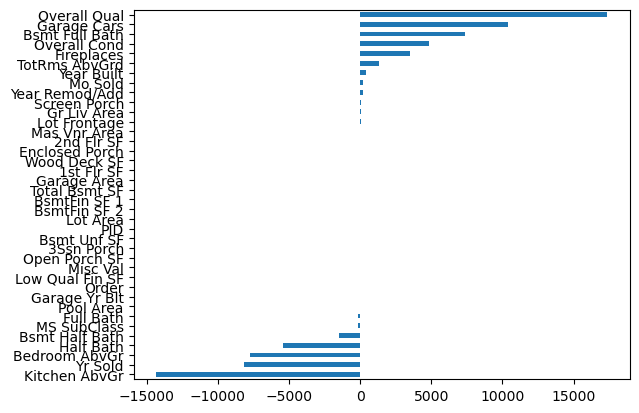

In [16]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values()
 .plot.barh())

<Axes: >

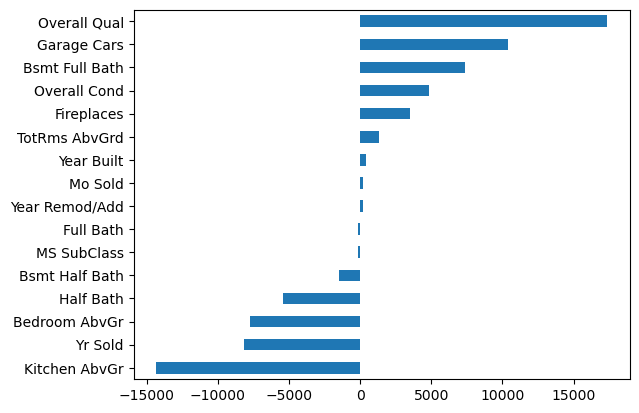

In [17]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .plot.barh())

In [18]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .index
)


Index(['Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual'],
      dtype='object')

## Standardizing Values

In [19]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [20]:
# was .84
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8434050101721933

<Axes: >

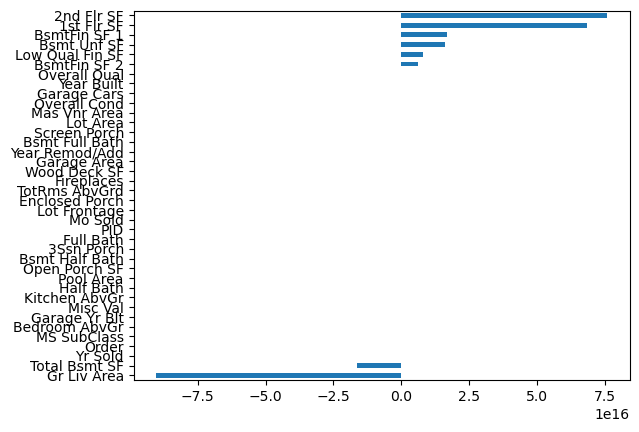

In [21]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .plot.barh())

In [22]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
# .plot.barh()
)

Gr Liv Area       -9.030962e+16
Total Bsmt SF     -1.643170e+16
Yr Sold           -1.074159e+04
Order             -8.775554e+03
MS SubClass       -6.958691e+03
Bedroom AbvGr     -6.370442e+03
Garage Yr Blt     -5.764922e+03
Misc Val          -5.567773e+03
Kitchen AbvGr     -3.042224e+03
Half Bath         -2.723834e+03
Pool Area         -1.481736e+03
Open Porch SF     -3.833228e+02
Bsmt Half Bath    -3.596183e+02
3Ssn Porch        -1.297597e+02
Full Bath         -7.984951e+01
PID                1.717517e+02
Mo Sold            6.489177e+02
Lot Frontage       9.685877e+02
Enclosed Porch     1.363122e+03
TotRms AbvGrd      2.120844e+03
Fireplaces         2.291082e+03
Wood Deck SF       2.475322e+03
Garage Area        3.162111e+03
Year Remod/Add     3.650766e+03
Bsmt Full Bath     3.874771e+03
Screen Porch       4.001419e+03
Lot Area           4.048819e+03
Mas Vnr Area       4.726475e+03
Overall Cond       5.355815e+03
Garage Cars        7.783218e+03
Year Built         1.186384e+04
Overall 

<Axes: >

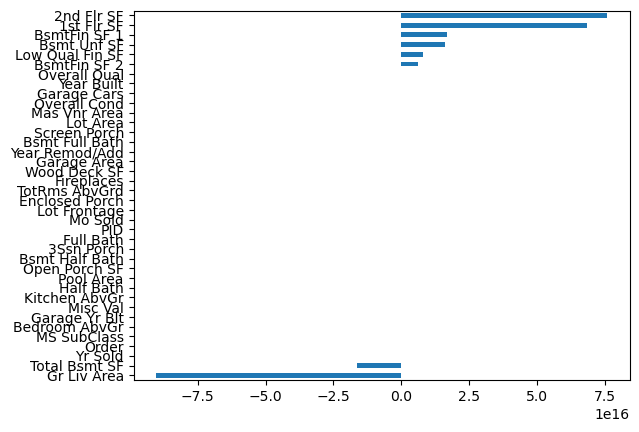

In [23]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .plot.barh()
)

<Axes: >

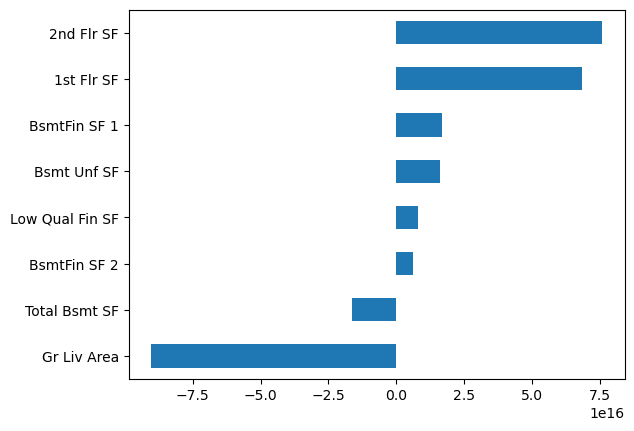

In [24]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .plot.barh()
)

In [25]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .index
)

Index(['Gr Liv Area', 'Total Bsmt SF', 'BsmtFin SF 2', 'Low Qual Fin SF',
       'Bsmt Unf SF', 'BsmtFin SF 1', '1st Flr SF', '2nd Flr SF'],
      dtype='object')

In [26]:
simple_feats = set(['Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual'])
std_feats = set(['Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Low Qual Fin SF',
       'BsmtFin SF 2', 'Gr Liv Area', 'Bsmt Unf SF', 'BsmtFin SF 1'])
print(sorted(simple_feats | std_feats))

['1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Fireplaces', 'Full Bath', 'Garage Cars', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF', 'MS SubClass', 'Mo Sold', 'Overall Cond', 'Overall Qual', 'TotRms AbvGrd', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']


In [27]:
# Look at correlations 
(X
 .assign(SalePrice=y)
 .corr()
 .loc[['SalePrice', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 
       'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Fireplaces', 'Full Bath', 
       'Garage Cars', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF',
       'MS SubClass', 'Mo Sold', 'Overall Cond', 'Overall Qual', 'TotRms AbvGrd', 
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']]
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
 .set_sticky(axis='index') 
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
SalePrice,-0.031408,-0.246521,-0.085092,0.201875,0.266549,0.799262,-0.101697,0.558426,0.532974,0.502196,0.433147,0.006018,0.183308,0.632529,0.621676,0.269373,-0.037660,0.706780,0.275823,-0.035817,0.545604,0.285056,0.143913,-0.119814,0.495474,0.474558,0.253317,0.647562,0.640138,0.327143,0.312951,-0.128787,0.032225,0.112151,0.068403,-0.015691,0.035259,-0.030569,1.000000
1st Flr SF,-0.013201,-0.141902,-0.247828,0.241707,0.332235,0.477837,-0.157052,0.310463,0.242108,0.392280,0.457586,0.084710,0.296139,0.800429,1.000000,-0.250057,-0.012689,0.562166,0.257836,0.010469,0.371584,-0.104203,0.106648,0.076025,0.390162,0.406345,0.147876,0.439471,0.491208,0.227131,0.238041,-0.065713,0.044061,0.098316,0.121821,0.093003,0.040496,-0.013667,0.621676
2nd Flr SF,-0.000417,-0.003289,0.304237,-0.002813,0.032996,0.241402,0.006218,0.016828,0.158939,0.120159,-0.163710,-0.098188,0.002320,-0.204487,-0.250057,1.000000,0.018024,0.655251,-0.163068,-0.059458,0.404143,0.611634,0.504651,0.069444,0.585214,0.165844,0.041983,0.180882,0.127508,0.089097,0.184538,0.055429,-0.032172,0.011741,0.044602,-0.005078,0.013247,-0.018530,0.269373
Bedroom AbvGr,0.015424,0.006345,-0.019208,0.112718,0.136569,0.063291,-0.006137,-0.055093,-0.021536,0.080590,-0.118575,-0.033033,0.188508,0.052721,0.106648,0.504651,0.070531,0.516808,-0.161084,0.020333,0.359489,0.247053,1.000000,0.240737,0.672647,0.076971,-0.038905,0.091135,0.073417,0.029711,0.083650,0.052115,-0.047151,0.009250,0.036707,0.000887,0.053677,-0.018008,0.143913
Bsmt Full Bath,-0.042499,-0.038306,0.014187,0.019554,0.124208,0.168373,-0.043458,0.212119,0.134590,0.139684,0.640212,0.163634,-0.398629,0.326861,0.257836,-0.163068,-0.047215,0.057367,1.000000,-0.149027,-0.023011,-0.035385,-0.161084,-0.018349,-0.043642,0.172775,0.064179,0.162644,0.184903,0.187283,0.080765,-0.069014,0.027086,0.052355,0.043730,-0.004817,-0.003322,0.044805,0.275823
Bsmt Half Bath,0.024987,0.004154,-0.003179,-0.031798,0.026448,-0.041433,0.084185,-0.030515,-0.046175,0.016609,0.077687,0.099147,-0.105784,0.012850,0.010469,-0.059458,-0.013385,-0.043498,-0.149027,1.000000,-0.046371,-0.057999,0.020333,-0.064671,-0.048069,0.038089,0.001307,-0.033210,-0.021147,0.051546,-0.035276,-0.009272,0.026971,0.042372,0.066911,0.036996,0.022741,-0.019556,-0.035817
Bsmt Unf SF,0.005842,-0.088102,-0.129987,0.139290,0.023883,0.270527,-0.137303,0.129311,0.165397,0.089662,-0.477244,-0.238420,1.000000,0.412248,0.296139,0.002320,0.047207,0.235870,-0.398629,-0.105784,0.274901,-0.033530,0.188508,0.065651,0.251633,0.001790,0.013214,0.180080,0.164837,-0.039285,0.119143,0.006383,-0.005399,-0.047945,-0.031963,-0.010125,0.021915,-0.036443,0.183308
BsmtFin SF 1,-0.032268,-0.098674,-0.059767,0.067034,0.191692,0.284458,-0.051341,0.280069,0.152240,0.299951,1.000000,-0.054022,-0.477244,0.536731,0.457586,-0.163710,-0.066129,0.209944,0.640212,0.077687,0.078086,-0.008205,-0.118575,-0.086654,0.048118,0.296098,0.125795,0.255311,0.309649,0.224199,0.125150,-0.100318,0.050567,0.095952,0.084147,0.092900,-0.000884,0.022341,0.433147
BsmtFin SF 2,-0.002758,-0.001245,-0.070847,-0.005254,0.083198,-0.041122,0.040992,-0.027328,-0.061934,-0.014955,-0.054022,1.000000,-0.238420,0.090109,0.084710,-0.098188,-0.004989,-0.017996,0.163634,0.099147,-0.076262,-0.033004,-0.033033,-0.037864,-0.049288,0.067180,0.048897,-0.014118,0.003625,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,-0.009401,0.007089,0.006018
Fireplaces,-0.019156,-0.108056,-0.049955,0.051240,0.256989,0.393007,-0.031702,0.170672,0.133322,0.270051,0.296098,0.067180,0.001790,0.333

##  Regression with XGBoost

In [28]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler().set_output(transform='pandas')
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [29]:
import xgboost as xgb
# was .84
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.9202607148589075

<Axes: >

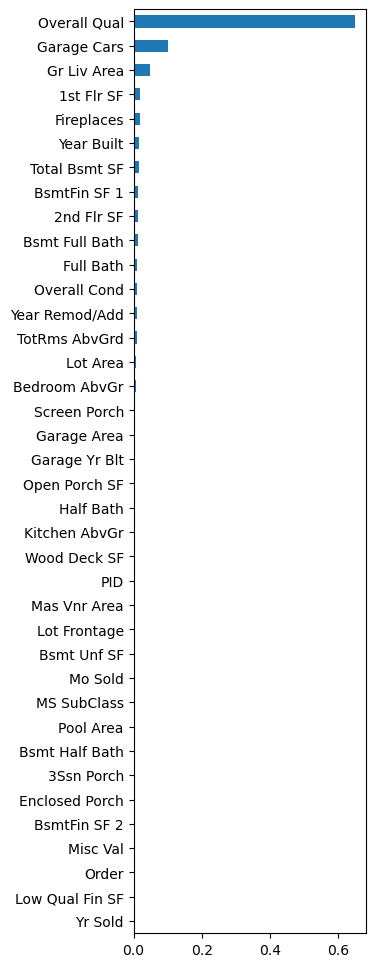

In [30]:
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().plot.barh(figsize=(3,12))

In [31]:
X_cat = (housing.assign(**housing.select_dtypes('number').astype('Int64')).drop(columns='SalePrice'))

y_cat = housing.SalePrice
X_cat_train, X_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(X_cat, y_cat, random_state=42)
xg_cat = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')
xg_cat.fit(X_cat_train, y_cat_train)
xg_cat.score(X_cat_test, y_cat_test)

0.921321470311472

<Axes: >

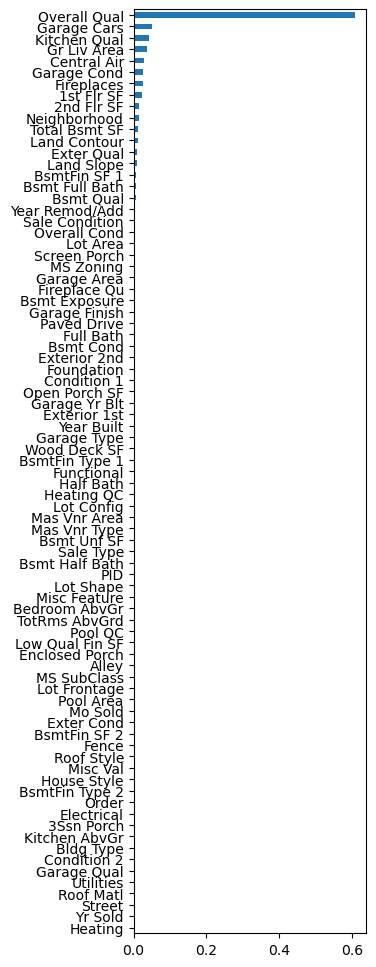

In [32]:
pd.Series(xg_cat.feature_importances_, index=xg_cat.feature_names_in_).sort_values().plot.barh(figsize=(3,12))